In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [62]:
# 일단 있는 숫자 하드코딩

# https://www.xspdf.com/resolution/53725554.html
# https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-csv-mixed-timezones
# df = pd.read_csv(StringIO(content), parse_dates=['a'],
#   .....:                  date_parser=lambda col: pd.to_datetime(col, utc=True))
    
test_df = pd.read_csv("test.csv", parse_dates=["/header/date", "/header/received/0/date", 
                                               "/header/received/1/date", "/header/received/2/date", 
                                               "/header/received/3/date", "/header/received/4/date", "/header/received/5/date"],
                      date_parser=lambda col: pd.to_datetime(col, utc=True))

In [64]:
del test_df["Unnamed: 0"]

In [66]:
test_df.head()

,/body/0/content_header/content-type,/body/0/content_header/content-transfer-encoding,/body/0/content_type,/body/0/hash,/body,/header/subject,/header/from,/header/to,/header/date,/header/received/0/src,...,/header/received/4/date_day,/header/received/4/date_hour,/header/received/4/date_minute,/header/received/4/date_second,/header/received/5/date_year,/header/received/5/date_month,/header/received/5/date_day,/header/received/5/date_hour,/header/received/5/date_minute,/header/received/5/date_second
0,\ntext/html;,\nquoted-printable,text/html,c8b7ce2719a430c03c1c2ce6a7e850625a7ba3161aa9c7...,NaN,Ȳ򺸸 ΰ! 2̸ OK! usofq apqb,jjfkjsfjk4514262@nate.com,\nk003912@dumburo.com,2019-08-29 11:39:36+00:00,"from 58.248.209.14(58.248.209.14) at thu, 29 a...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,\ntext/html;,\nquoted-printable,text/html,b18f28945d693b6934296b1d9b08b66325841802f7ecd5...,NaN,ȭ BJ ̺ մϴ.,yenjuy@outlook.kr,\nhanh5@sannoroo.co.kr,2020-04-05 20:29:25+00:00,"from 122.97.133.171(122.97.133.171) at mon, 06...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,\ntext/html;,\nquoted-printable,text/html,d592cecefa3eb54218b38986af85f3fd802b22206e9368...,NaN,Ȳ򺸸- ƴϳ׿. Ư ! ! l uruysc,hjas91546@naver.com,\nps6601@greenrabbit.co.kr,2019-07-05 06:42:08+00:00,"from 219.139.240.195(219.139.240.195) at fri, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"\ntext/plain; charset=""utf-8""",\n7bit,text/plain,c0d825fc3178c499e86870947263c60bd2a4d3b6c9a125...,NaN,IRA/401(k): Covid-19 is Sweeping the Nation,augusta_precious_metals@thgmj.work,\napril411@smmobi.com,2020-06-10 16:38:23+00:00,"from 92.118.114.40(92.118.114.40) at thu, 11 j...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"\ntext/html; charset=""iso-8859-1""",\nbase64,text/html,09ef619724713fa53e16a67ac8eb80f468976b7345a22a...,NaN,Ich bin jetzt frei fr dich;),eugenespencero@etb.net.co,\nhkchoi70@windows4unix.net,2020-05-16 02:06:45+00:00,"from 200.119.125.194(200.119.125.194) at sat, ...",...,16.0,2.0,18.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
date_types = ["/header/date", "/header/received/0/date", 
             "/header/received/1/date", "/header/received/2/date",
             "/header/received/3/date", "/header/received/4/date", "/header/received/5/date"]

for date_type in date_types:
    test_df[date_type + "_year"] = test_df[date_type].dt.year
    test_df[date_type + "_month"] = test_df[date_type].dt.month
    test_df[date_type + "_day"] = test_df[date_type].dt.day
    test_df[date_type + "_hour"] = test_df[date_type].dt.hour
    test_df[date_type + "_minute"] = test_df[date_type].dt.minute
    test_df[date_type + "_second"] = test_df[date_type].dt.second

In [68]:
test_df.head()

,/body/0/content_header/content-type,/body/0/content_header/content-transfer-encoding,/body/0/content_type,/body/0/hash,/body,/header/subject,/header/from,/header/to,/header/date,/header/received/0/src,...,/header/received/4/date_day,/header/received/4/date_hour,/header/received/4/date_minute,/header/received/4/date_second,/header/received/5/date_year,/header/received/5/date_month,/header/received/5/date_day,/header/received/5/date_hour,/header/received/5/date_minute,/header/received/5/date_second
0,\ntext/html;,\nquoted-printable,text/html,c8b7ce2719a430c03c1c2ce6a7e850625a7ba3161aa9c7...,NaN,Ȳ򺸸 ΰ! 2̸ OK! usofq apqb,jjfkjsfjk4514262@nate.com,\nk003912@dumburo.com,2019-08-29 11:39:36+00:00,"from 58.248.209.14(58.248.209.14) at thu, 29 a...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,\ntext/html;,\nquoted-printable,text/html,b18f28945d693b6934296b1d9b08b66325841802f7ecd5...,NaN,ȭ BJ ̺ մϴ.,yenjuy@outlook.kr,\nhanh5@sannoroo.co.kr,2020-04-05 20:29:25+00:00,"from 122.97.133.171(122.97.133.171) at mon, 06...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,\ntext/html;,\nquoted-printable,text/html,d592cecefa3eb54218b38986af85f3fd802b22206e9368...,NaN,Ȳ򺸸- ƴϳ׿. Ư ! ! l uruysc,hjas91546@naver.com,\nps6601@greenrabbit.co.kr,2019-07-05 06:42:08+00:00,"from 219.139.240.195(219.139.240.195) at fri, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"\ntext/plain; charset=""utf-8""",\n7bit,text/plain,c0d825fc3178c499e86870947263c60bd2a4d3b6c9a125...,NaN,IRA/401(k): Covid-19 is Sweeping the Nation,augusta_precious_metals@thgmj.work,\napril411@smmobi.com,2020-06-10 16:38:23+00:00,"from 92.118.114.40(92.118.114.40) at thu, 11 j...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"\ntext/html; charset=""iso-8859-1""",\nbase64,text/html,09ef619724713fa53e16a67ac8eb80f468976b7345a22a...,NaN,Ich bin jetzt frei fr dich;),eugenespencero@etb.net.co,\nhkchoi70@windows4unix.net,2020-05-16 02:06:45+00:00,"from 200.119.125.194(200.119.125.194) at sat, ...",...,16.0,2.0,18.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
def visualization_datetime(df, column):
    figure, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
    figure.set_size_inches(25,12)
    
    sns.countplot(x=column+'_year', data=df, ax=ax1)
    sns.countplot(x=column+'_month', data=df, ax=ax2)
    sns.countplot(x=column+'_day', data=df, ax=ax3)
    sns.countplot(x=column+'_hour', data=df, ax=ax4)
    sns.countplot(x=column+'_minute', data=df, ax=ax5)
    sns.countplot(x=column+'_second', data=df, ax=ax6)
    
    #g = sns.countplot(x=column+'_year', data=df, ax=ax1)
    #g.set_xticklabels(g.get_xticklabels(), rotation=45,
    #              horizontalalignment='right',
    #              fontweight='light',
    #              fontsize='x-small')
    
    #plt.show()


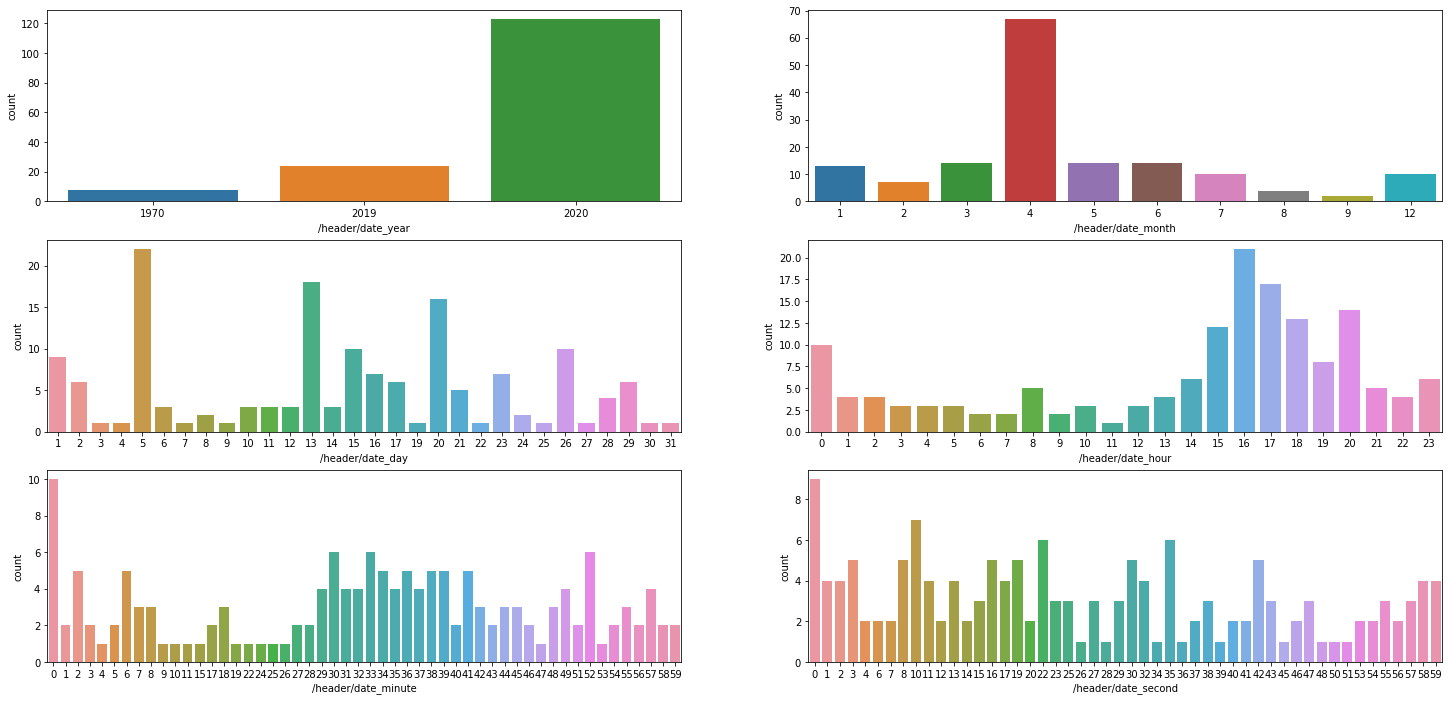

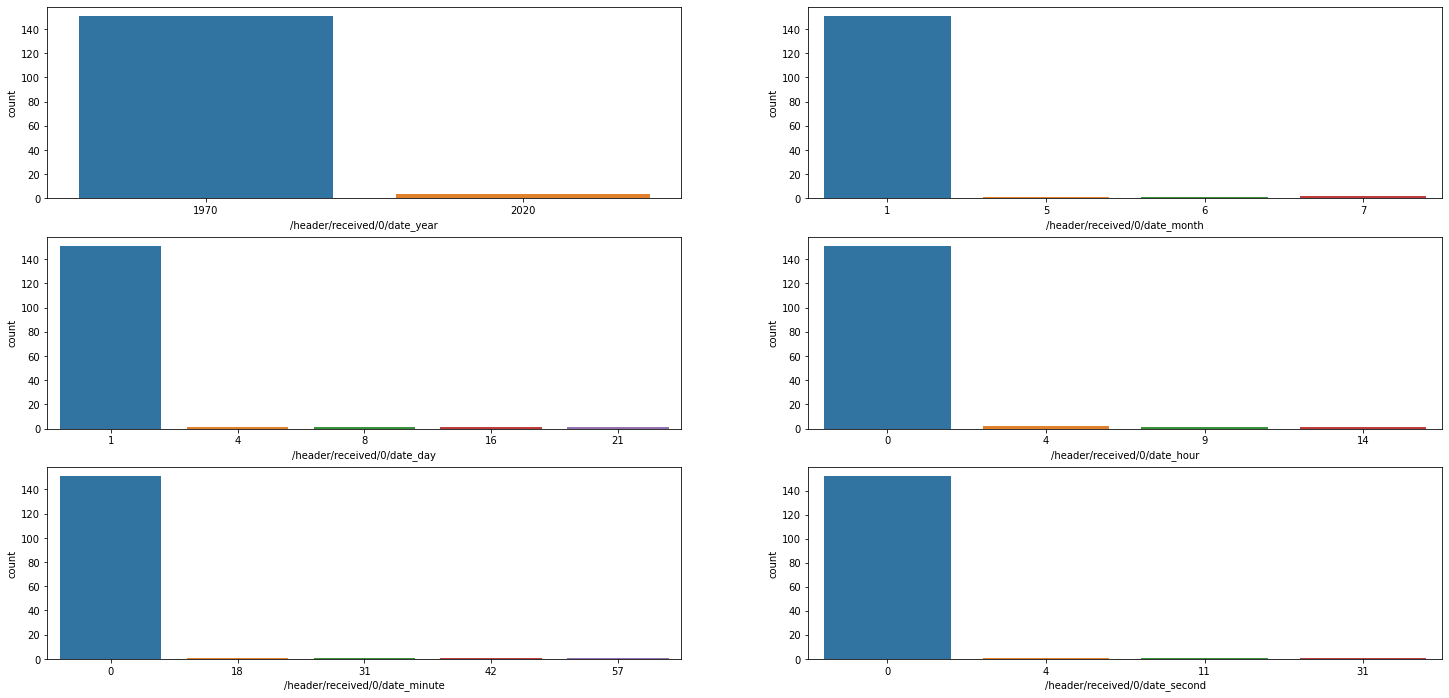

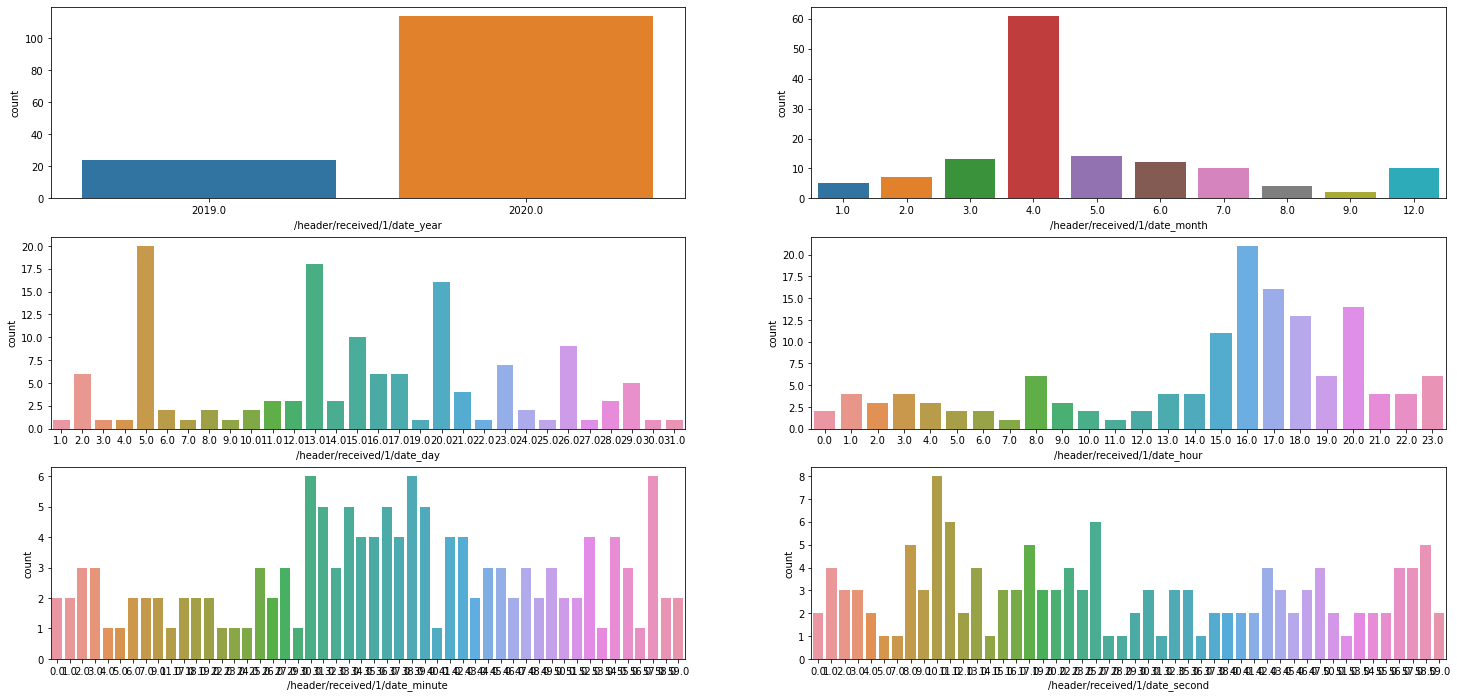

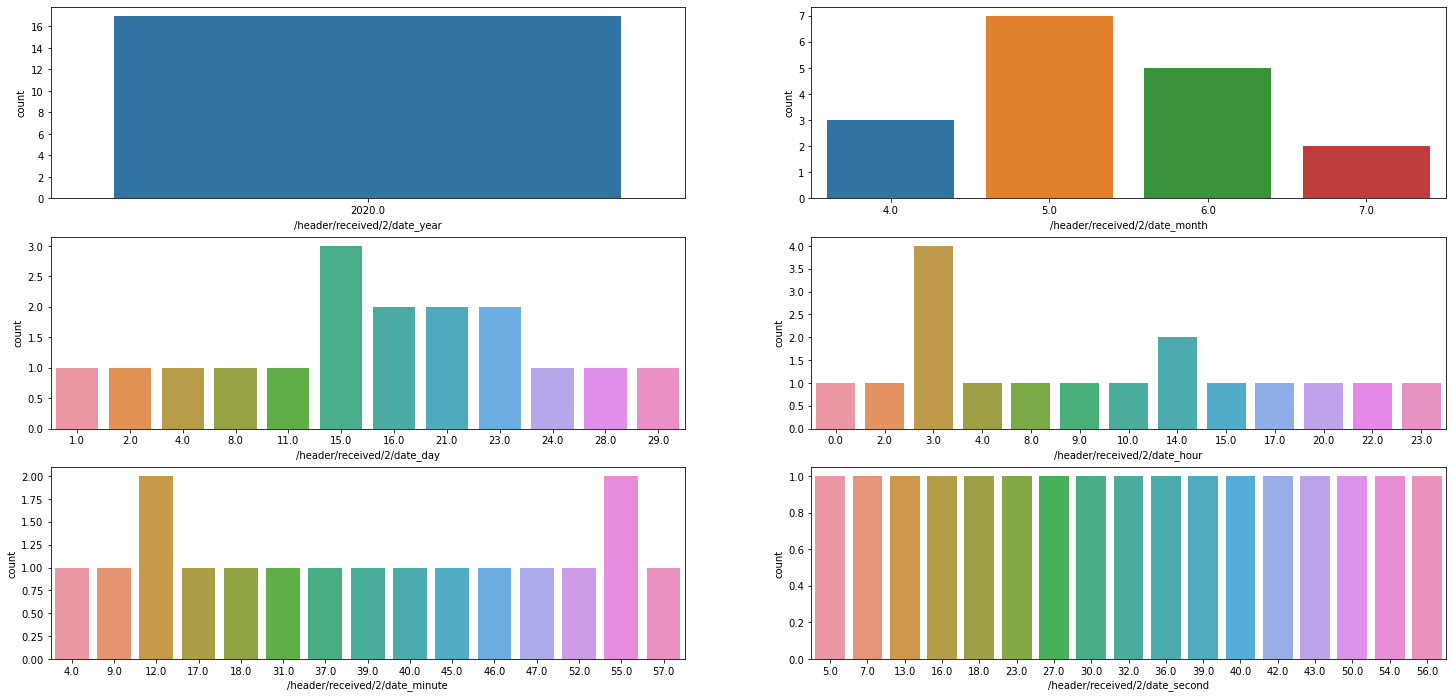

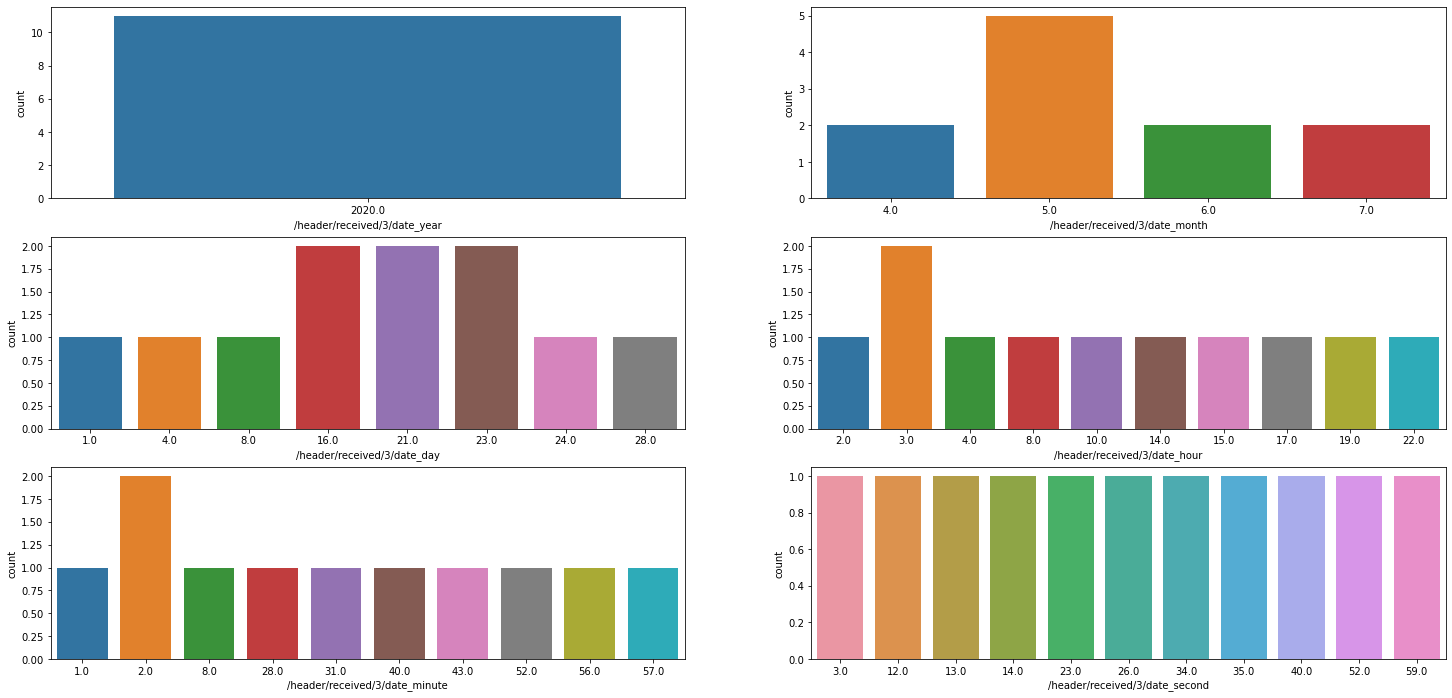

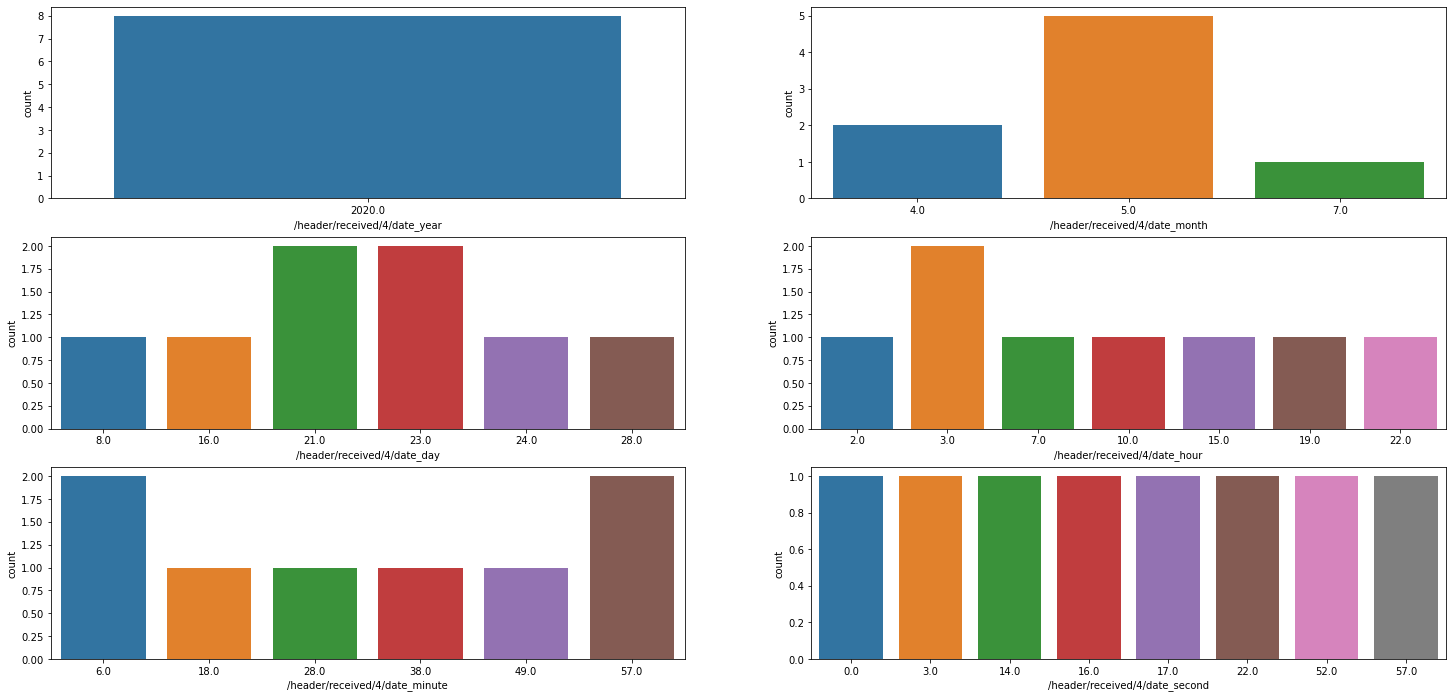

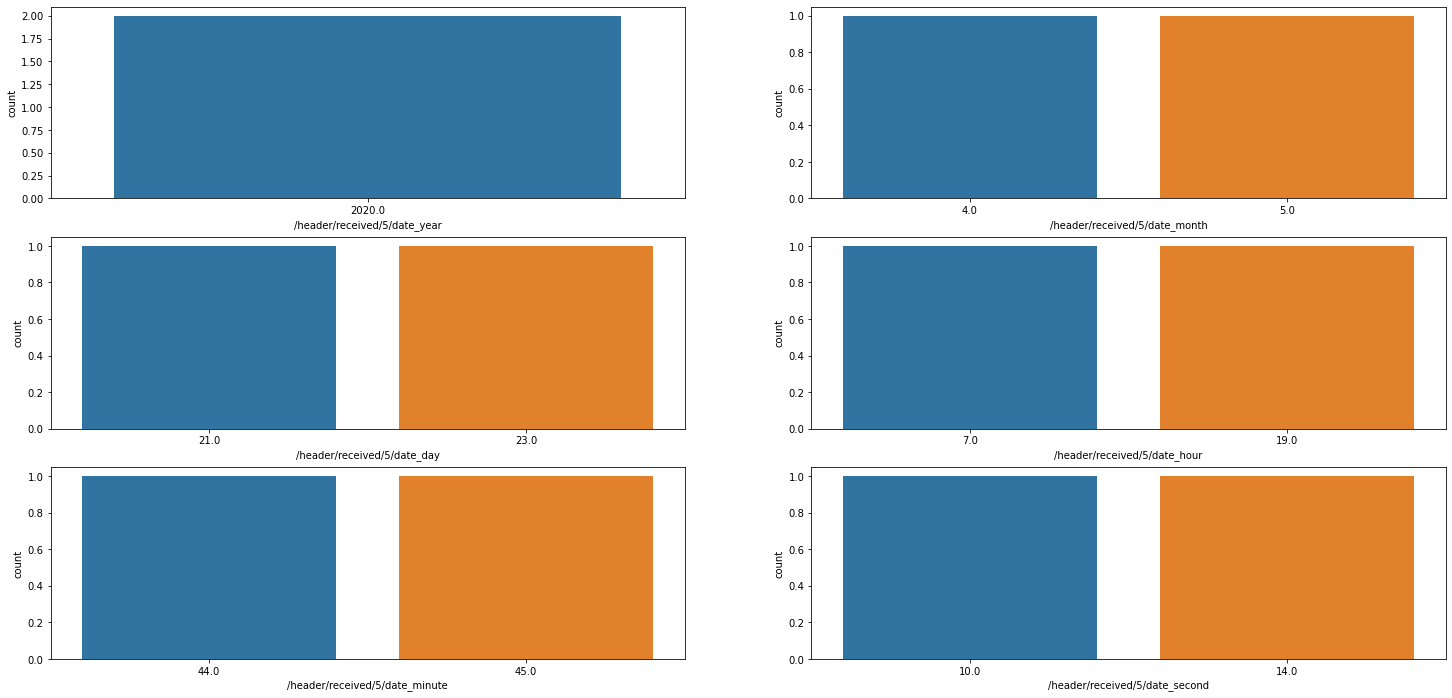

In [102]:
for date_type in date_types:
    visualization_datetime(test_df, date_type)